### Treatment

In [2]:
import kagglehub
import pandas as pd


path = kagglehub.dataset_download("tawfikelmetwally/wine-dataset")

data_raw = pd.read_csv(path + "/Wine dataset.csv")
data_raw.head()

c:\Users\carlo\OneDrive\Área de Trabalho\Faculdade\ML\wineClassification\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()

data_norm = data_raw.copy()
data_norm[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
           'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']] = scaller.fit_transform(data_raw[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium' , 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline ']])
data_norm.head()    

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,1,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,1,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Normalizei todas as colunas da tabela para uma melhor análize de métrica e desemprnho na classificação do modelo

### Analysis

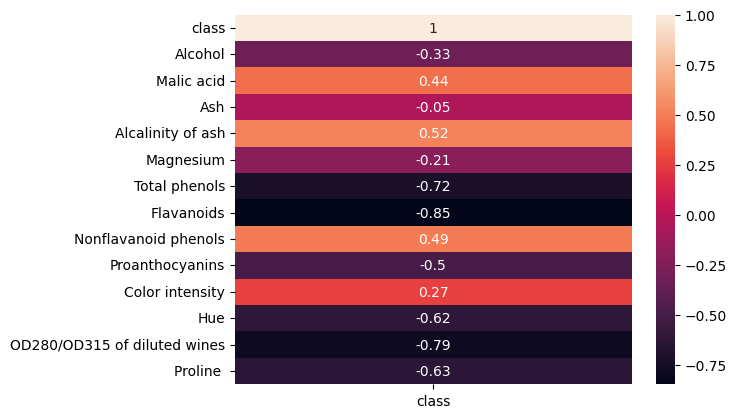

In [6]:
sns.heatmap(data_norm.corr()[['class']], annot=True)
plt.show()

Pode-se observar que as colunas com maiores correlações (> 0,6) são:
- 'Total phenols'
- 'Flavanoids'
- 'Hue'
- 'OD280/OD315 of diluted wines'
- 'Magnesium'
- 'Proline'

In [7]:
data_norm.columns

Index(['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline '],
      dtype='object')

In [8]:
data_ml = data_norm[['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Magnesium', 'Proline ', 'class']]

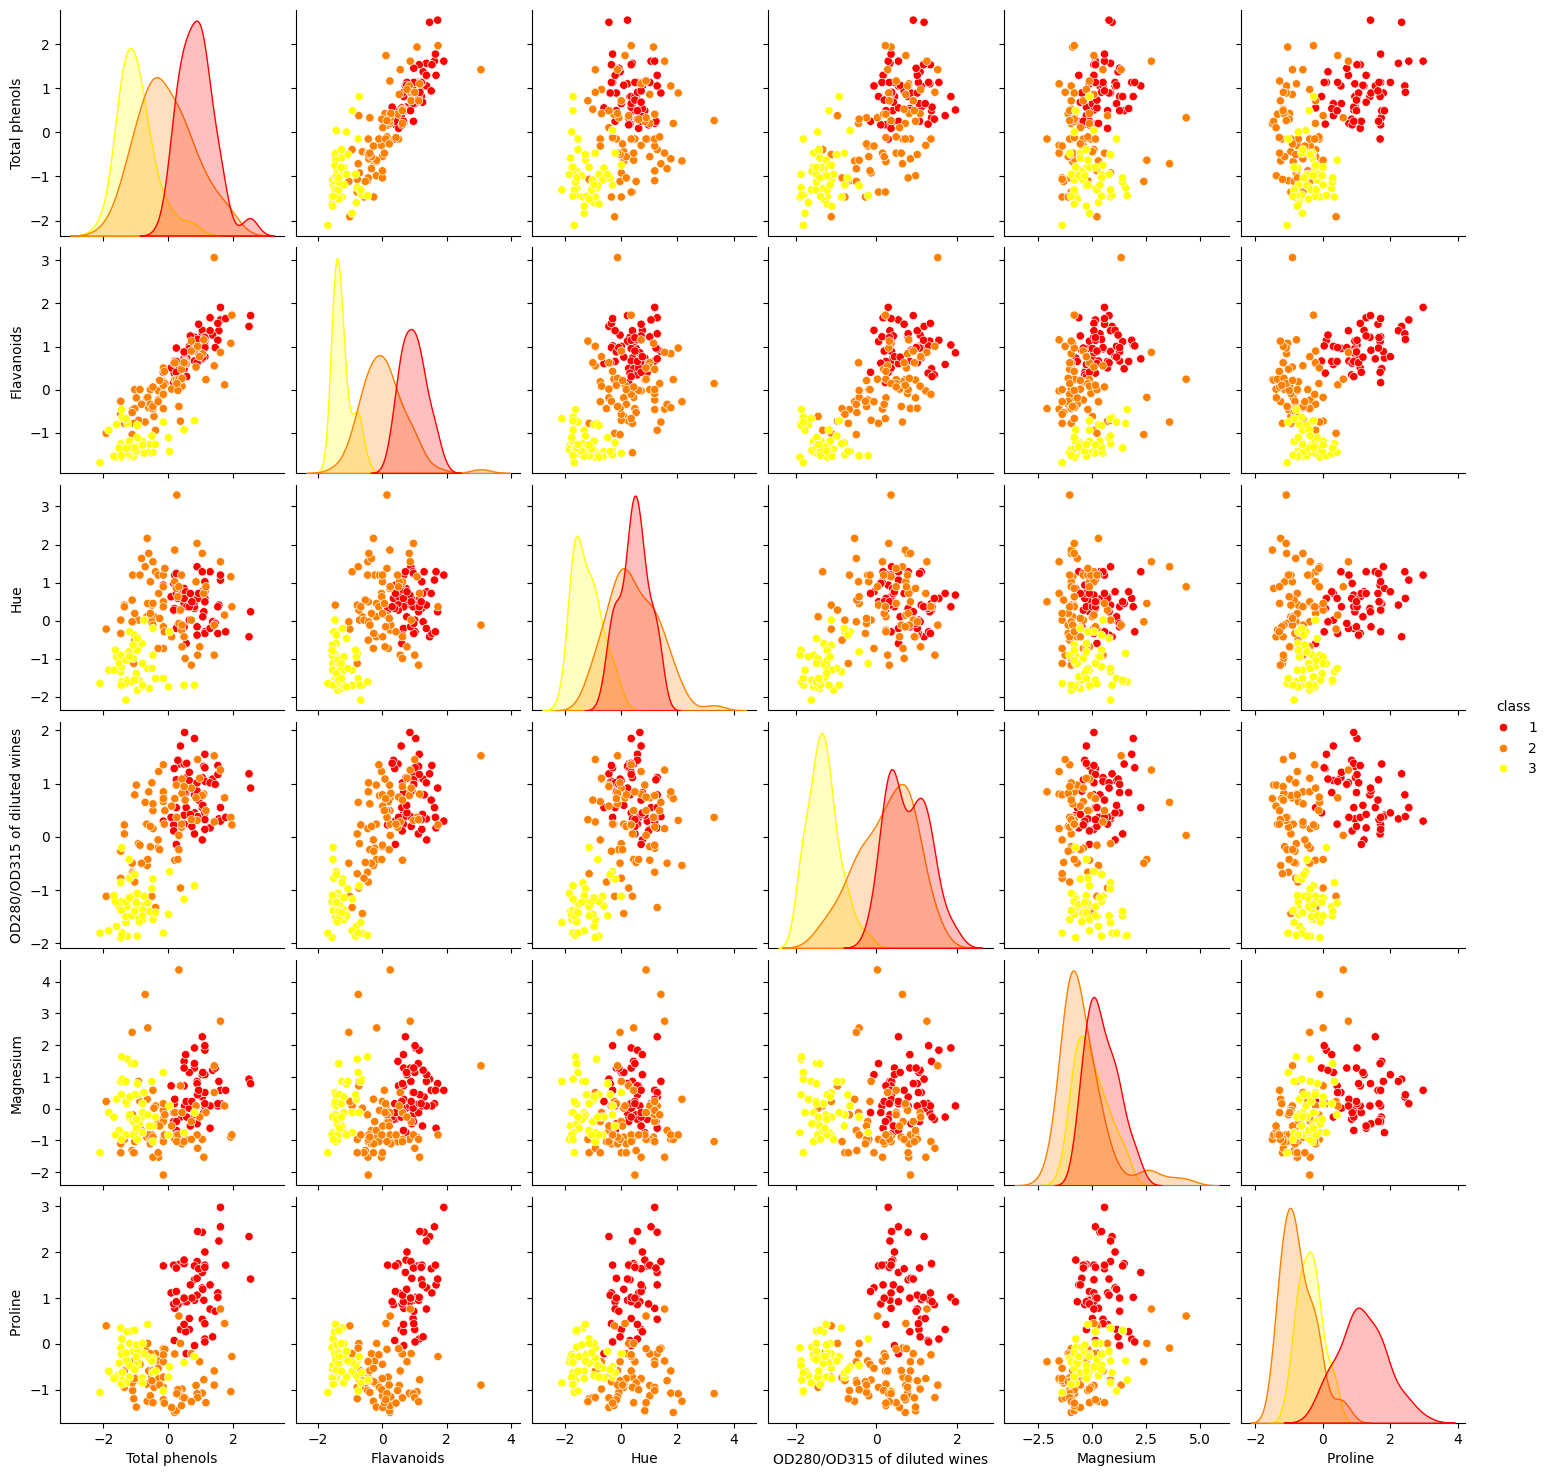

In [9]:
sns.pairplot(data_ml,hue="class", palette="autumn")
plt.show()

Análise das diferentes maneiras de agrupamento das classes. A maior parte deles se tem sobreposição, mas em cada métrica sempre tem uma combinação que consegue separar bem os tipos de classes. Observamos também que "Proline" consegue diferenciar bem os diferentes tipos de classes.

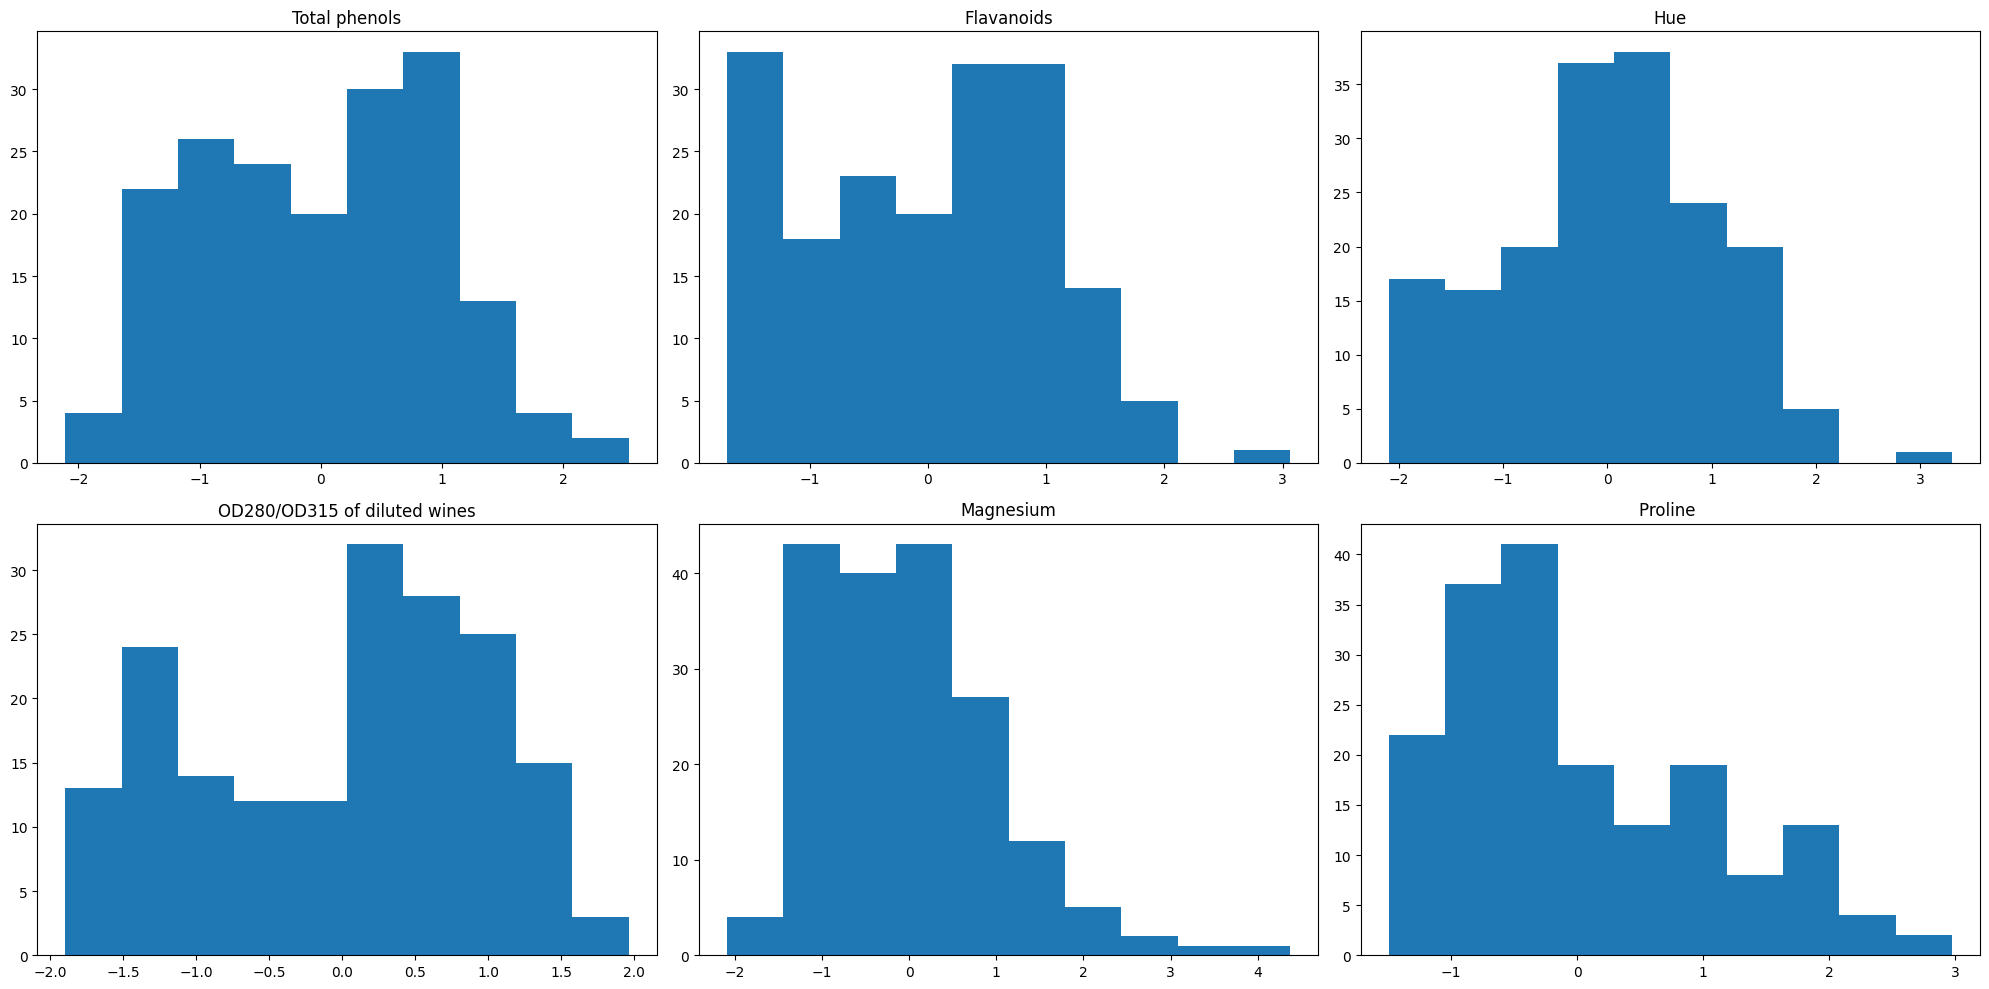

In [10]:
import numpy as np


plot_titles = ['Total phenols', 'Flavanoids', 'Hue', 'OD280/OD315 of diluted wines', 'Magnesium', 'Proline ']

fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()


for i, title in enumerate(plot_titles):
    axs[i].hist(data_ml[title])  
    axs[i].set_title(title)  

plt.tight_layout()
plt.show()

### Modelo

In [11]:
from collections import Counter


def euclidean_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def manhattan_dist(x1, x2):
    return np.sum(np.abs(x1 - x2))

def minkowski_dist(x1, x2, p):
    return np.sum(np.abs(x1 - x2)**p)**(1/p)

In [12]:
# Configuração do modelo KNN, onde é possível utilizar 3 diferentes distancias para a classificação (Manhattan, Euclideana e Minkowski).

class KNN_model:
    def __init__(self, k, distance):
        self.k = k
        self.distance = distance
        self.X_train = None
        self.y_train = None
        
    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train, dtype=float)
        self.y_train = np.array(y_train)
             
    def predict(self, X_test):
        X_test = np.array(X_test, dtype=float)
        y_pred = [self._predict(x) for x in X_test]
        return np.array(y_pred)
        
    def _predict(self, x):
        if self.distance == 'euclidean':
            distances = [euclidean_dist(x, x_train) for x_train in self.X_train]
        elif self.distance == 'manhattan':
            distances = [manhattan_dist(x, x_train) for x_train in self.X_train]
        elif self.distance == 'minkowski':
            distances = [minkowski_dist(x, x_train, 3) for x_train in self.X_train]
        
        k_index = np.argsort(distances)[:self.k]  
        k_nearest_labels = [self.y_train[i] for i in k_index] 
        
     
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

### Training

In [13]:
from sklearn.model_selection import train_test_split

X = data_ml.drop(columns=['class'])
y = data_ml['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Verificando o balanceamento das classes

counter_train = Counter(y_train)
counter_test = Counter(y_test)

print(counter_train)
print(counter_test)


Counter({2: 50, 1: 40, 3: 34})
Counter({2: 21, 1: 19, 3: 14})


Distance: euclidean
  K: 17
  Acc: 0.981481


C:\Users\carlo\AppData\Local\Temp\ipykernel_26024\2539943952.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Distance: manhattan
  K: 1
  Acc: 0.981481
Distance: minkowski
  K: 63
  Acc: 0.981481


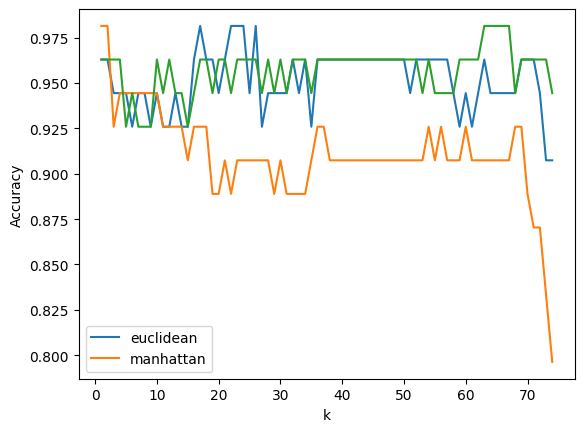

In [15]:
from sklearn.metrics import accuracy_score


# Comparação de acurácia para diferentes valores de K 
k_values = range(1, 75)

def distances_comp(dist):
    x_results = []
    y_results = []  
    best_k = 0
    best_accuracy = 0
    
    for k in k_values:
        model = KNN_model(k=k, distance=dist)
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        if best_accuracy == 0 or accuracy > best_accuracy:
            best_k = k
            best_accuracy = accuracy

        x_results.append(k)
        y_results.append(accuracy)
    
    print(f'Distance: {dist}\n  K: {best_k}\n  Acc: {round(best_accuracy,6)}')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt.plot(x_results, y_results, label=dist)


distances_comp('euclidean')
distances_comp('manhattan')
distances_comp('minkowski')

Análise dos resultados do número de vizinhos por acurácia utilizando diferentes distncias para classificação, para utilizar o número de vizinho que se tem o melhor resultado, juntamente com o tipo da distancia utilizada.

In [16]:
knn = KNN_model(k=17, distance='euclidean')
knn.fit(X_train, y_train)

In [17]:
pred = knn.predict(X_test)

data_result =  X_test.copy()
data_result['class'] = y_test   
data_result['class_pred'] = pred

data_result.head()

,Total phenols,Flavanoids,Hue,OD280/OD315 of diluted wines,Magnesium,Proline,class,class_pred
19,0.648764,1.004700,0.011190,1.056952,1.141558,0.312420,1,1
45,0.889114,0.623193,-0.383670,1.014578,0.790492,1.060776,1,1
140,-1.209940,-1.535336,-0.822404,-0.426113,-0.262708,-0.467781,3,3
30,1.129464,1.225573,1.020278,0.138864,0.088358,1.713598,1,1
67,-0.296611,-0.029386,0.713164,1.226445,-1.526548,-0.754385,2,2


### Validation

In [18]:
from sklearn.metrics import classification_report

# Verificando a acuracia do modelo
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [19]:
y_pred = knn.predict(X_test)
y_pred


array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

In [20]:
np.array(y_test)

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 2,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3], dtype=int64)

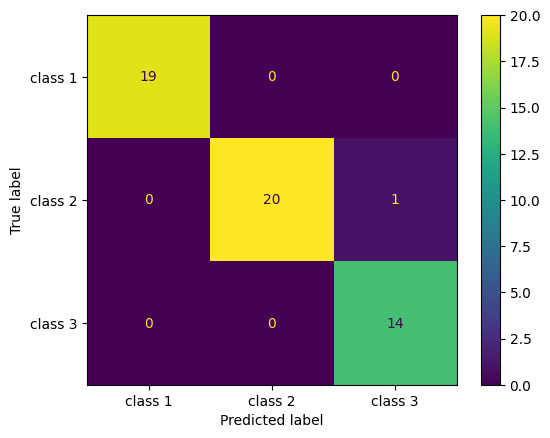

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['class 1', 'class 2', 'class 3'])
disp.plot()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print(f'Accuracy: {round(acc, 4)}\nPrecision: {round(prec, 4)}\nRecall: {round(rec, 4)}\nF1 Score: {round(f1, 4)}')

Accuracy: 0.9815
Precision: 0.9778
Recall: 0.9841
F1 Score: 0.9804
